# 单变量线性回归     lm

## 训练数据为一个公司流动购物车的收益，与其所在城市的人口数量，使用线性回归模型进行拟合
## 来源吴恩达机器学习公开课，代码参考网络并进行了一些改进


## 显示原始数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path =  'C:/Users/liuming/.ipynb_checkpoints/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


1.用path保存数据文件路径（注意：路径应使用'/'，用'\'会报错）。  
2.用pandas中的read_csv读取数据，返回dataframe表格型数据类型，首个参数是文件路径，也就是path表示的字符串，name被赋值,header=None,表示自动给行的index，name为列的表头。  
3.head函数默认显示前五行数据。  

<function matplotlib.pyplot.show(close=None, block=None)>

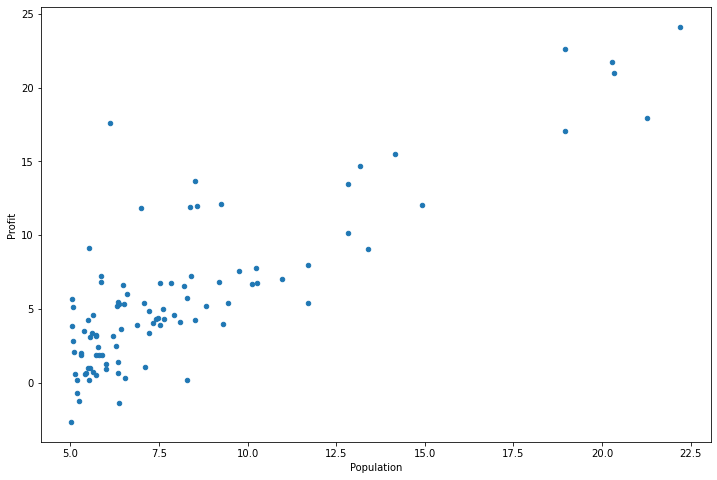

In [3]:
data.plot(x='Population', y='Profit',  kind='scatter', figsize=(12,8))
plt.show

1.pandas是numpy与plt的集合体，其中有便捷的绘图函数plot，有多个可传入参数，其中前两项分别为x，y轴的名称，kind表示绘图的样式，figsize用来指定图的大小。  
2.plt中的show函数，显示图片。

## 代价函数

In [4]:
def costFounction(X, y, theta):
    sum = ((X * theta.T) - y).T * ((X * theta.T) - y)
    return sum / (2 * len(X))

代价函数：X是输入的数据，y是X对应的结果，theta是模型参数，X * theta.T是假设函数的矩阵形式， ((X * theta.T) - y).T * ((X * theta.T) - y)：用自己与自己的转置相乘的形式来表示平方和求和，复杂的平方再求和的步骤，用一个矩阵的乘法轻松解决，注意这其中的矩阵思想，“万物皆矩阵”！！！！

In [5]:
data.insert(0, "ones", 1)

insert函数，向df中插入指定列，第一个参数代表location，第二个参数为列名，第三个参数为该列的值，可以是数字，数组，series

In [6]:
data.head()

,ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
col = data.shape[1]
col

3

df.shape[1]和df.shape[0]分别用来查看列的的数量和行的数量

In [8]:
X = data.iloc[:, 0:col - 1]
type(X)

pandas.core.frame.DataFrame

iloc[]根据坐标从df中选取数据，他的参数也可以是两个切片，从而对df进行分割，第一个切片为针对行，第二个切片针对列
去除数据中的最后一列，也就是真实值y，剩下的两列就是每个参数的特征值

In [9]:
X = np.matrix(X.values)  # 根据X的值做成矩阵以便进行运算
type(X)

numpy.matrix

In [10]:
y = data.iloc[:, col - 1:col]
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))  # theta 是一个(1,2)矩阵
costFounction(X, y, theta)  # 求出代价函数的值32.072733877455676,是1*1的矩阵

matrix([[32.07273388]])

## 梯度下降算法

In [11]:
def gradientDescent(X, y, theta, alpha, iters):
    """梯度下降算法
    alpha：学习率
    iters：迭代次数
    theta：为最初设置的模型参数
    """
    cost = np.zeros(iters) # 构造一个矩阵，用来接收每次迭代的代价值，以便后面进行直观观察
    m = len(X)  # m是样本的个数，也就是x的长度
    for i in range(iters):  # 循环迭代，注意这里for循环的用法，range()返回一个可迭代的对象
        theta = theta - (alpha / m) * (X * theta.T - y).T * X
        # 注意这个也是用矩阵代替复杂运算，(X * theta.T).T * X：跟上面的代价函数一样都是用两个矩阵相乘直接算出了sum（其中一个要进行转置）
        cost[i] = costFounction(X, y, theta)
    return theta, cost 

梯度下降算法，要求的是同时更新所有theta模型参数，但使用矩阵运算时，实际上就相当于了同时更新

In [12]:
alpha = 0.01 # 设置学习率
iters = 1000 # 设置迭代次数

In [13]:
final_theta, cost = gradientDescent(X, y, theta, alpha, iters)
costFounction(X, y, final_theta) # 查看一下迭代后的最终代价值

matrix([[4.5159555]])

## 得出最终的假设函数

In [14]:
x = np.linspace(data.Population.min(), data.Population.max(), 200) # 设置假设函数中自变量的取值

numpy.linspace()函数：再指定间隔内，返回均匀间隔的数字，第三个参数是返回的个数，返回值是ndarray的数据类型

In [15]:
h = final_theta[0, 0] * 1 + final_theta[0, 1] * x # 假设函数
type(h) # 注意h的数据类型

numpy.ndarray

## 可视化所有结果

<function matplotlib.pyplot.show(close=None, block=None)>

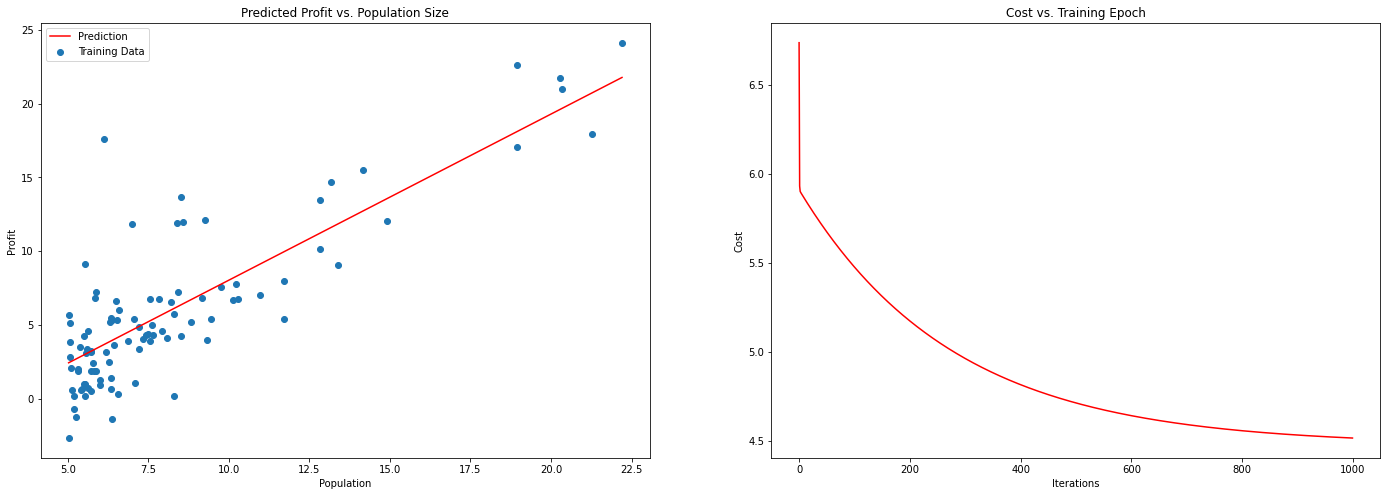

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(24,8)) # 创建画布
ax[0].plot(x, h, 'r', label = 'Prediction') # 在第一个子图中绘制假设函数图像，颜色为red，并设置标签
ax[0].scatter(data.Population, data.Profit, label='Training Data') # 同时在第一个子图中画出训练数据的散点图
ax[0].legend() # legend函数专门用来显示图例（标签）
ax[0].set(xlabel='Population', ylabel='Profit', title='Predicted Profit vs. Population Size') # set函数设置子图的各个属性

ax[1].plot(np.arange(iters), cost, 'r') # 在第二个子图中绘制迭代次数与代价函数值的图像，直观显示梯度下降的结果
ax[1].set(xlabel='Iterations', ylabel='Cost', title='Cost vs. Training Epoch')
plt.show

1.subplots函数创建画布和子图，前两个参数就像数组一样，后面是整个画布的size  
2.plot与scatter都是要接收x与y轴的数据分布来绘制图像，而不是只接受一个函数就行  
3.np.arange()函数返回一个序列，默认是从0到所输入的参数，步长为1